# BASIC STRUCTURED QUERY LANGUAGE - SQL

SQL o lenguaje de consulta estructurado, es un tipo de lenguaje que se vincula con la gestion de los datos de una base de datos relacional. Permite llevar a cabo consultas, relaciones y operaciones sobre los datos guardados en una o varias tablas de una base de datos. Como se habia mencionado en sesiones anteriores, la interacción de un usuario con una base de datos no se hace directamente sobre el archivo o data almacenada sino a través de un gestor de bases de datos. 


<div style="display: flex; flex-direction: row; justify-content: space-bewtween; text-align:center;">
  <img src="https://secureservercdn.net/160.153.137.163/84g.4be.myftpupload.com/wp-content/uploads/2019/09/SQL-Cheat-Sheet-660x330.png" style="width: 50%;"/>
  <img src="./images/sql_facts.png" style="width: 60%; "/>
</div>
<!--
<div style="text-align:center;">
    <img src="https://secureservercdn.net/160.153.137.163/84g.4be.myftpupload.com/wp-content/uploads/2019/09/SQL-Cheat-Sheet-660x330.png"
     style="display: block; margin-left: auto; margin-right: auto; width:60%;">
<sup>Imagen obtenidad de <a href="http://www.techgeekbuzz.com/sql-cheat-sheet/">http://www.techgeekbuzz.com/sql-cheat-sheet</a></sup>
</div>
-->
<br>

Para comunicarse con este gestor se hace uso de SQL para que este se encague de procesar la peticion o Query y extraiga la data requerida. Una de las ventajas de SQL, es que a pesar de que haya distintos motores de bases de datos, es un lenguaje que se puede usar con todos ellos. 

<img src="https://blogs.bmc.com/wp-content/uploads/2018/08/dbms-database-management-systems-810x898.png"
     style="display: block; margin-left: auto; margin-right: auto; width:30%;">


No obstante, es importante que algunos gestores/motores de bases de datos pueden tener algunas semanticas de SQL adicionales o diferentes en comparación con otros, relacionado con las funcionalidades adicionales. Esto último responde mas que todo a las mejoras que un motor de base de datos introduzca, pero SQL sigue siendo un estandar universal, independiente de la DB usada.

Es importante resaltar también que SQL no es un lenguaje de programación donde se especifica el flujo de un proceso sino que es un lenguaje declarativo, donde se le especifica que es lo que se quiere obtener. Por tal razon es Human-readable

<img src="https://nitrocdn.com/GuYcnotRkcKfJXshTEEKnCZTOtUwxDnm/assets/static/optimized/rev-07ab08c/wp-content/uploads/2020/01/rdbms-600x282.png"
     style="display: block; margin-left: auto; margin-right: auto; width:35%;">



<!-- <img src="https://3.bp.blogspot.com/-kzJ-aqghbhk/VJUDGychv1I/AAAAAAAAAmU/-pnHERsWL0M/s1600/baseDatosSqlServer.PNG" -->
<!--     style="display: block; margin-left: auto; margin-right: auto; width:50%;"/> -->


En este notebook vamos a ver algunos ejemplos de como trabajar con bases de datos desde python usando las ordenes mas comunes de SQL:

<img src="https://www.improgrammer.net/wp-content/uploads/2017/01/Untitled.png"
     style="display: block; margin-left: auto; margin-right: auto; width:80%;">


Por facilidad y para poner en práctica de forma rápida la sintaxis de SQL, usaremos SQLite (https://www.sqlite.org/index.html). Tambien se puede hacer uso de MySQL, Postgress, Oracle entre otros, pero se necesita instalar el gestor de cada uno de estos motores de base de datos. La ventaja de sqlite es que viene por defecto para linux/python por lo que no se requiere de hacer una instalación adicional. Sse consultara el uso de la sintaxis de sqlite en este link: https://www.sqlitetutorial.net/. Recuerde que igual, SQL es un standard por lo que  la mayoria de las ordenes usadas aqui, se pueden usar en otro gestor de base de datos.

<img src="https://media.cheatography.com/storage/thumb/richardjh_sqlite3.750.jpg"
     style="display: block; margin-left: auto; margin-right: auto; width:50%;">


## SQLite desde el notebook

Vamos a probar algunas ordenes de SQL usando directamente el notebook de jupyter. Eso se puede hacer usando tambien los GUI para SQLite: SQLITE browser o SQLite Studio. Se puede usar tambien la linea de comandos de linux para ejecutar cada una de estas ordenes.

Vamos a instalar primero un plugin que permite usar SQL con magic cells en jupyter. De lo contrario, seria necesario usar las herramientas mencionadas anteriormente o usar python directamente

In [8]:
 !pip install ipython-sql

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 42 kB 90 kB/s  eta 0:00:011
Using legacy setup.py install for prettytable, since package 'wheel' is not installed.
    Running setup.py install for prettytable ... done


In [1]:
 %load_ext sql

%sql sqlite:///datos/analytic.db

Se crea una tabla de prueeba, para verificar el funcionamiento. Se usa `%%sql sqlite://` para escribir varias ordenes en mas de una linea

In [3]:
%%sql sqlite://
CREATE TABLE Estudiantes_v2(
    Nombre VARCHAR(50) NOT NULL,
    Apellido VARCHAR(50) NOT NULL,  
    UserID int  NOT NULL UNIQUE, 
    PRIMARY KEY (UserID)
);

Done.


[]

In [4]:
%%sql sqlite://
INSERT INTO Estudiantes_V2 VALUES ('Name1', 'LastName1', 12);
INSERT INTO Estudiantes_V2 VALUES ('Name2', 'LastName2', 25);
INSERT INTO Estudiantes_V2 VALUES ('Name3', 'LastName3', 48);

1 rows affected.
1 rows affected.
1 rows affected.


[]

In [5]:
%sql SELECT * FROM Estudiantes

 * sqlite:///datos/analytic.db
Done.


[('Name1', 'LastName1', 12),
 ('Name2', 'LastName2', 25),
 ('Name3', 'LastName3', 48)]

In [6]:
table = %sql SELECT * FROM Estudiantes
type(table)

 * sqlite:///datos/analytic.db
Done.


sql.run.ResultSet

In [7]:
table.dict()

{'Nombre': ('Name1', 'Name2', 'Name3'),
 'Apellido': ('LastName1', 'LastName2', 'LastName3'),
 'UserID': (12, 25, 48)}

Vamos a cargar la base de datos de betsellers de Amazon obtenida de kaggle: 

In [1]:
 %load_ext sql

In [2]:
%sql sqlite:///datos/analytic.db

In [3]:
%sql PRAGMA table_info(bestsellers);

 * sqlite:///datos/analytic.db
Done.


[(0, 'Name', 'TEXT', 0, None, 0),
 (1, 'Author', 'TEXT', 0, None, 0),
 (2, 'UserRating', 'REAL', 0, None, 0),
 (3, 'Reviews', 'INTEGER', 0, None, 0),
 (4, 'Price', 'INTEGER', 0, None, 0),
 (5, 'Year', 'INTEGER', 0, None, 0),
 (6, 'Genre', 'TEXT', 0, None, 0)]

In [9]:
%sql SELECT * FROM bestsellers LIMIT(10)

 * sqlite:///datos/analytic.db
Done.


[('10-Day Green Smoothie Cleanse', 'JJ Smith', 4.7, 17350, 8, 2016, 'Non Fiction'),
 ('11/22/63: A Novel', 'Stephen King', 4.6, 2052, 22, 2011, 'Fiction'),
 ('12 Rules for Life: An Antidote to Chaos', 'Jordan B. Peterson', 4.7, 18979, 15, 2018, 'Non Fiction'),
 ('1984 (Signet Classics)', 'George Orwell', 4.7, 21424, 6, 2017, 'Fiction'),
 ('5,000 Awesome Facts (About Everything!) (National Geographic Kids)', 'National Geographic Kids', 4.8, 7665, 12, 2019, 'Non Fiction'),
 ('A Dance with Dragons (A Song of Ice and Fire)', 'George R. R. Martin', 4.4, 12643, 11, 2011, 'Fiction'),
 ('A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons', 'George R. R. Martin', 4.7, 19735, 30, 2014, 'Fiction'),
 ('A Gentleman in Moscow: A Novel', 'Amor Towles', 4.7, 19699, 15, 2017, 'Fiction'),
 ('A Higher Loyalty: Truth, Lies, and Leadership', 'James Comey', 4.7, 5983, 3, 2018, 'Non Fiction'),
 ('A Man Called Ove: A Novel', 'Fredrik Backman', 4.6, 23848, 8, 2016, 'Fiction')]

In [12]:
%sql SELECT COUNT(*) FROM bestsellers

 * sqlite:///datos/analytic.db
Done.


[(550,)]

In [13]:
%sql SELECT Name,Author FROM bestsellers LIMIT(10)

 * sqlite:///datos/analytic.db
Done.


[('10-Day Green Smoothie Cleanse', 'JJ Smith'),
 ('11/22/63: A Novel', 'Stephen King'),
 ('12 Rules for Life: An Antidote to Chaos', 'Jordan B. Peterson'),
 ('1984 (Signet Classics)', 'George Orwell'),
 ('5,000 Awesome Facts (About Everything!) (National Geographic Kids)', 'National Geographic Kids'),
 ('A Dance with Dragons (A Song of Ice and Fire)', 'George R. R. Martin'),
 ('A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons', 'George R. R. Martin'),
 ('A Gentleman in Moscow: A Novel', 'Amor Towles'),
 ('A Higher Loyalty: Truth, Lies, and Leadership', 'James Comey'),
 ('A Man Called Ove: A Novel', 'Fredrik Backman')]

In [5]:
name = "bestsellers"
%sql SELECT * FROM "{name}" LIMIT(10)

 * sqlite:///datos/analytic.db
Done.


[('10-Day Green Smoothie Cleanse', 'JJ Smith', 4.7, 17350, 8, 2016, 'Non Fiction'),
 ('11/22/63: A Novel', 'Stephen King', 4.6, 2052, 22, 2011, 'Fiction'),
 ('12 Rules for Life: An Antidote to Chaos', 'Jordan B. Peterson', 4.7, 18979, 15, 2018, 'Non Fiction'),
 ('1984 (Signet Classics)', 'George Orwell', 4.7, 21424, 6, 2017, 'Fiction'),
 ('5,000 Awesome Facts (About Everything!) (National Geographic Kids)', 'National Geographic Kids', 4.8, 7665, 12, 2019, 'Non Fiction'),
 ('A Dance with Dragons (A Song of Ice and Fire)', 'George R. R. Martin', 4.4, 12643, 11, 2011, 'Fiction'),
 ('A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons', 'George R. R. Martin', 4.7, 19735, 30, 2014, 'Fiction'),
 ('A Gentleman in Moscow: A Novel', 'Amor Towles', 4.7, 19699, 15, 2017, 'Fiction'),
 ('A Higher Loyalty: Truth, Lies, and Leadership', 'James Comey', 4.7, 5983, 3, 2018, 'Non Fiction'),
 ('A Man Called Ove: A Novel', 'Fredrik Backman', 4.6, 23848, 8, 2016, 'Fiction')]

In [22]:
%sql SELECT * FROM "{name}" WHERE UserRating >= 4.8 LIMIT(20)

 * sqlite:///datos/analytic.db
Done.


[('5,000 Awesome Facts (About Everything!) (National Geographic Kids)', 'National Geographic Kids', 4.8, 7665, 12, 2019, 'Non Fiction'),
 ('Alexander Hamilton', 'Ron Chernow', 4.8, 9198, 13, 2016, 'Non Fiction'),
 ('Barefoot Contessa Foolproof: Recipes You Can Trust: A Cookbook', 'Ina Garten', 4.8, 1296, 24, 2012, 'Non Fiction'),
 ('Becoming', 'Michelle Obama', 4.8, 61133, 11, 2018, 'Non Fiction'),
 ('Becoming', 'Michelle Obama', 4.8, 61133, 11, 2019, 'Non Fiction'),
 ('Being Mortal: Medicine and What Matters in the End', 'Atul Gawande', 4.8, 11113, 15, 2015, 'Non Fiction'),
 ('Brown Bear, Brown Bear, What Do You See?', 'Bill Martin Jr.', 4.9, 14344, 5, 2017, 'Fiction'),
 ('Brown Bear, Brown Bear, What Do You See?', 'Bill Martin Jr.', 4.9, 14344, 5, 2019, 'Fiction'),
 ('Cabin Fever (Diary of a Wimpy Kid, Book 6)', 'Jeff Kinney', 4.8, 4505, 0, 2011, 'Fiction'),
 ("Can't Hurt Me: Master Your Mind and Defy the Odds", 'David Goggins', 4.8, 16244, 18, 2019, 'Non Fiction'),
 ('Creative Haven Creative Cats Coloring Book (Adult Coloring)', 'Marjorie Sarnat', 4.8, 4022, 4, 2015, 'Non Fiction'),
 ('Creative Haven Owls Coloring Book (Adult Coloring)', 'Marjorie Sarnat', 4.8, 3871, 5, 2015, 'Non Fiction'),
 ('Daring Greatly: How the Courage to Be Vulnerable Transforms the Way We Live, Love, Parent, and Lead', 'Brené Brown', 4.8, 1329, 10, 2013, 'Non Fiction'),
 ('Dear Zoo: A Lift-the-Flap Book', 'Rod Campbell', 4.8, 10922, 5, 2015, 'Fiction'),
 ('Dear Zoo: A Lift-the-Flap Book', 'Rod Campbell', 4.8, 10922, 5, 2016, 'Fiction'),
 ('Dear Zoo: A Lift-the-Flap Book', 'Rod Campbell', 4.8, 10922, 5, 2017, 'Fiction'),
 ('Dear Zoo: A Lift-the-Flap Book', 'Rod Campbell', 4.8, 10922, 5, 2018, 'Fiction'),
 ('Diary of a Wimpy Kid: Hard Luck, Book 8', 'Jeff Kinney', 4.8, 6812, 0, 2013, 'Fiction'),
 ('Diary of a Wimpy Kid: The Last Straw (Book 3)', 'Jeff Kinney', 4.8, 3837, 15, 2009, 'Fiction'),
 ('Diary of a Wimpy Kid: The Long Haul', 'Jeff Kinney', 4.8, 6540, 22, 2014, 'Fiction')]

In [16]:
%sql SELECT MIN(UserRating),MAX(UserRating) FROM "{name}" 

 * sqlite:///datos/analytic.db
Done.


[(3.3, 4.9)]

In [20]:
%sql SELECT * FROM "{name}" WHERE (UserRating BETWEEN 3.0 AND 3.8) LIMIT(20)

 * sqlite:///datos/analytic.db
Done.


[('Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)', 'E L James', 3.8, 47265, 14, 2012, 'Fiction'),
 ('Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)', 'E L James', 3.8, 47265, 14, 2013, 'Fiction'),
 ('Go Set a Watchman: A Novel', 'Harper Lee', 3.6, 14982, 19, 2015, 'Fiction'),
 ('The Casual Vacancy', 'J.K. Rowling', 3.3, 9372, 12, 2012, 'Fiction')]

In [23]:
%sql SELECT * FROM "{name}" WHERE (UserRating BETWEEN 3.2 AND 3.8) AND Year==2012 LIMIT(20)

 * sqlite:///datos/analytic.db
Done.


[('Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)', 'E L James', 3.8, 47265, 14, 2012, 'Fiction'),
 ('The Casual Vacancy', 'J.K. Rowling', 3.3, 9372, 12, 2012, 'Fiction')]

In [25]:
%sql SELECT * FROM "{name}" WHERE Author LIKE "%Martin%" 

 * sqlite:///datos/analytic.db
Done.


[('A Dance with Dragons (A Song of Ice and Fire)', 'George R. R. Martin', 4.4, 12643, 11, 2011, 'Fiction'),
 ('A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons', 'George R. R. Martin', 4.7, 19735, 30, 2014, 'Fiction'),
 ('Brown Bear, Brown Bear, What Do You See?', 'Bill Martin Jr.', 4.9, 14344, 5, 2017, 'Fiction'),
 ('Brown Bear, Brown Bear, What Do You See?', 'Bill Martin Jr.', 4.9, 14344, 5, 2019, 'Fiction'),
 ('Game of Thrones Boxed Set: A Game of Thrones/A Clash of Kings/A Storm of Swords/A Feast for Crows', 'George R.R. Martin', 4.6, 5594, 5, 2011, 'Fiction'),
 ('Game of Thrones Boxed Set: A Game of Thrones/A Clash of Kings/A Storm of Swords/A Feast for Crows', 'George R.R. Martin', 4.6, 5594, 5, 2012, 'Fiction'),
 ('Game of Thrones Boxed Set: A Game of Thrones/A Clash of Kings/A Storm of Swords/A Feast for Crows', 'George R.R. Martin', 4.6, 5594, 5, 2013, 'Fiction'),
 ('The Wonderful Things You Will Be', 'Emily Winfield Martin', 4.9, 8842, 10, 2016, 'Fiction'),
 ('The Wonderful Things You Will Be', 'Emily Winfield Martin', 4.9, 8842, 10, 2017, 'Fiction'),
 ('The Wonderful Things You Will Be', 'Emily Winfield Martin', 4.9, 8842, 10, 2018, 'Fiction'),
 ('The Wonderful Things You Will Be', 'Emily Winfield Martin', 4.9, 8842, 10, 2019, 'Fiction')]

In [29]:
%sql SELECT * FROM "{name}" WHERE Author LIKE "%Martin" 

 * sqlite:///datos/analytic.db
Done.


[('A Dance with Dragons (A Song of Ice and Fire)', 'George R. R. Martin', 4.4, 12643, 11, 2011, 'Fiction'),
 ('A Game of Thrones / A Clash of Kings / A Storm of Swords / A Feast of Crows / A Dance with Dragons', 'George R. R. Martin', 4.7, 19735, 30, 2014, 'Fiction'),
 ('Game of Thrones Boxed Set: A Game of Thrones/A Clash of Kings/A Storm of Swords/A Feast for Crows', 'George R.R. Martin', 4.6, 5594, 5, 2011, 'Fiction'),
 ('Game of Thrones Boxed Set: A Game of Thrones/A Clash of Kings/A Storm of Swords/A Feast for Crows', 'George R.R. Martin', 4.6, 5594, 5, 2012, 'Fiction'),
 ('Game of Thrones Boxed Set: A Game of Thrones/A Clash of Kings/A Storm of Swords/A Feast for Crows', 'George R.R. Martin', 4.6, 5594, 5, 2013, 'Fiction'),
 ('The Wonderful Things You Will Be', 'Emily Winfield Martin', 4.9, 8842, 10, 2016, 'Fiction'),
 ('The Wonderful Things You Will Be', 'Emily Winfield Martin', 4.9, 8842, 10, 2017, 'Fiction'),
 ('The Wonderful Things You Will Be', 'Emily Winfield Martin', 4.9, 8842, 10, 2018, 'Fiction'),
 ('The Wonderful Things You Will Be', 'Emily Winfield Martin', 4.9, 8842, 10, 2019, 'Fiction')]

In [30]:
#usando expresiones regulares
%sql SELECT * FROM "{name}" WHERE Author regexp("^[Gg].*(Martin)") 

 * sqlite:///datos/analytic.db
(sqlite3.OperationalError) no such function: regexp
[SQL: SELECT * FROM "bestsellers" WHERE Author regexp("^[Gg].*(Martin)")]
(Background on this error at: http://sqlalche.me/e/13/e3q8)


In [49]:
#sudo apt install sqlite-pcre
#sqlite3 test.db
#.load /usr/lib/sqlite3/pcre.so

Efectuando esa operacion desde la terminal o cli de sqlite:

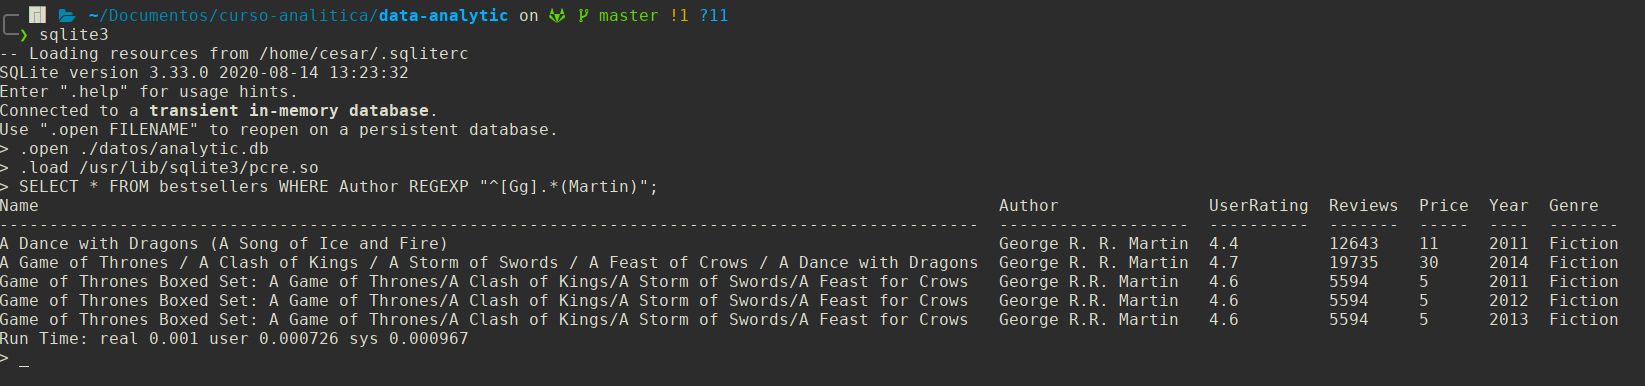

In [31]:
%sql SELECT * from '{name}' WHERE (UserRating > 4.5) AND (YEAR == 2019) AND (GENRE== 'Fiction')

 * sqlite:///datos/analytic.db
Done.


[('Brown Bear, Brown Bear, What Do You See?', 'Bill Martin Jr.', 4.9, 14344, 5, 2019, 'Fiction'),
 ('Dog Man: Brawl of the Wild: From the Creator of Captain Underpants (Dog Man #6)', 'Dav Pilkey', 4.9, 7235, 4, 2019, 'Fiction'),
 ('Dog Man: Fetch-22: From the Creator of Captain Underpants (Dog Man #8)', 'Dav Pilkey', 4.9, 12619, 8, 2019, 'Fiction'),
 ('Dog Man: For Whom the Ball Rolls: From the Creator of Captain Underpants (Dog Man #7)', 'Dav Pilkey', 4.9, 9089, 8, 2019, 'Fiction'),
 ("Giraffes Can't Dance", 'Giles Andreae', 4.8, 14038, 4, 2019, 'Fiction'),
 ('Goodnight Moon', 'Margaret Wise Brown', 4.8, 8837, 5, 2019, 'Fiction'),
 ('Harry Potter and the Goblet of Fire: The Illustrated Edition (Harry Potter, Book 4) (4)', 'J. K. Rowling', 4.9, 7758, 18, 2019, 'Fiction'),
 ('If Animals Kissed Good Night', 'Ann Whitford Paul', 4.8, 16643, 4, 2019, 'Fiction'),
 ("Oh, the Places You'll Go!", 'Dr. Seuss', 4.9, 21834, 8, 2019, 'Fiction'),
 ("Player's Handbook (Dungeons & Dragons)", 'Wizards RPG Team', 4.8, 16990, 27, 2019, 'Fiction'),
 ('Strange Planet (Strange Planet Series)', 'Nathan W. Pyle', 4.9, 9382, 6, 2019, 'Fiction'),
 ('The Very Hungry Caterpillar', 'Eric Carle', 4.9, 19546, 5, 2019, 'Fiction'),
 ('The Wonderful Things You Will Be', 'Emily Winfield Martin', 4.9, 8842, 10, 2019, 'Fiction'),
 ('The Wonky Donkey', 'Craig Smith', 4.8, 30183, 4, 2019, 'Fiction'),
 ('To Kill a Mockingbird', 'Harper Lee', 4.8, 26234, 7, 2019, 'Fiction'),
 ('What Should Danny Do? (The Power to Choose Series)', 'Adir Levy', 4.8, 8170, 13, 2019, 'Fiction'),
 ('Where the Crawdads Sing', 'Delia Owens', 4.8, 87841, 15, 2019, 'Fiction'),
 ('Wrecking Ball (Diary of a Wimpy Kid Book 14)', 'Jeff Kinney', 4.9, 9413, 8, 2019, 'Fiction')]

In [32]:
%sql SELECT * from '{name}' WHERE UserRating IN(4.8,4.9,3.8) ORDER BY UserRating ASC

 * sqlite:///datos/analytic.db
Done.


[('Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)', 'E L James', 3.8, 47265, 14, 2012, 'Fiction'),
 ('Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)', 'E L James', 3.8, 47265, 14, 2013, 'Fiction'),
 ('5,000 Awesome Facts (About Everything!) (National Geographic Kids)', 'National Geographic Kids', 4.8, 7665, 12, 2019, 'Non Fiction'),
 ('Alexander Hamilton', 'Ron Chernow', 4.8, 9198, 13, 2016, 'Non Fiction'),
 ('Barefoot Contessa Foolproof: Recipes You Can Trust: A Cookbook', 'Ina Garten', 4.8, 1296, 24, 2012, 'Non Fiction'),
 ('Becoming', 'Michelle Obama', 4.8, 61133, 11, 2018, 'Non Fiction'),
 ('Becoming', 'Michelle Obama', 4.8, 61133, 11, 2019, 'Non Fiction'),
 ('Being Mortal: Medicine and What Matters in the End', 'Atul Gawande', 4.8, 11113, 15, 2015, 'Non Fiction'),
 ('Cabin Fever (Diary of a Wimpy Kid, Book 6)', 'Jeff Kinney', 4.8, 4505, 0, 2011, 'Fiction'),
 ("Can't Hurt Me: Master Your Mind and Defy the Odds", 'David Goggins', 4.8, 16244, 18, 2019, 'Non Fiction'),
 ('Creative Haven Creative Cats Coloring Book (Adult Coloring)', 'Marjorie Sarnat', 4.8, 4022, 4, 2015, 'Non Fiction'),
 ('Creative Haven Owls Coloring Book (Adult Coloring)', 'Marjorie Sarnat', 4.8, 3871, 5, 2015, 'Non Fiction'),
 ('Daring Greatly: How the Courage to Be Vulnerable Transforms the Way We Live, Love, Parent, and Lead', 'Brené Brown', 4.8, 1329, 10, 2013, 'Non Fiction'),
 ('Dear Zoo: A Lift-the-Flap Book', 'Rod Campbell', 4.8, 10922, 5, 2015, 'Fiction'),
 ('Dear Zoo: A Lift-the-Flap Book', 'Rod Campbell', 4.8, 10922, 5, 2016, 'Fiction'),
 ('Dear Zoo: A Lift-the-Flap Book', 'Rod Campbell', 4.8, 10922, 5, 2017, 'Fiction'),
 ('Dear Zoo: A Lift-the-Flap Book', 'Rod Campbell', 4.8, 10922, 5, 2018, 'Fiction'),
 ('Diary of a Wimpy Kid: Hard Luck, Book 8', 'Jeff Kinney', 4.8, 6812, 0, 2013, 'Fiction'),
 ('Diary of a Wimpy Kid: The Last Straw (Book 3)', 'Jeff Kinney', 4.8, 3837, 15, 2009, 'Fiction'),
 ('Diary of a Wimpy Kid: The Long Haul', 'Jeff Kinney', 4.8, 6540, 22, 2014, 'Fiction'),
 ('Dog Days (Diary of a Wimpy Kid, Book 4) (Volume 4)', 'Jeff Kinney', 4.8, 3181, 12, 2009, 'Fiction'),
 ('Double Down (Diary of a Wimpy Kid #11)', 'Jeff Kinney', 4.8, 5118, 20, 2016, 'Fiction'),
 ("Giraffes Can't Dance", 'Giles Andreae', 4.8, 14038, 4, 2015, 'Fiction'),
 ("Giraffes Can't Dance", 'Giles Andreae', 4.8, 14038, 4, 2016, 'Fiction'),
 ("Giraffes Can't Dance", 'Giles Andreae', 4.8, 14038, 4, 2017, 'Fiction'),
 ("Giraffes Can't Dance", 'Giles Andreae', 4.8, 14038, 4, 2018, 'Fiction'),
 ("Giraffes Can't Dance", 'Giles Andreae', 4.8, 14038, 4, 2019, 'Fiction'),
 ('Go the F**k to Sleep', 'Adam Mansbach', 4.8, 9568, 9, 2011, 'Fiction'),
 ('Goodnight Moon', 'Margaret Wise Brown', 4.8, 8837, 5, 2017, 'Fiction'),
 ('Goodnight Moon', 'Margaret Wise Brown', 4.8, 8837, 5, 2018, 'Fiction'),
 ('Goodnight Moon', 'Margaret Wise Brown', 4.8, 8837, 5, 2019, 'Fiction'),
 ('Guts', 'Raina Telgemeier', 4.8, 5476, 7, 2019, 'Non Fiction'),
 ('Happy, Happy, Happy: My Life and Legacy as the Duck Commander', 'Phil Robertson', 4.8, 4148, 11, 2013, 'Non Fiction'),
 ('Harry Potter Paperback Box Set (Books 1-7)', 'J. K. Rowling', 4.8, 13471, 52, 2016, 'Fiction'),
 ('Have a Little Faith: A True Story', 'Mitch Albom', 4.8, 1930, 4, 2009, 'Non Fiction'),
 ('Homebody: A Guide to Creating Spaces You Never Want to Leave', 'Joanna Gaines', 4.8, 3776, 22, 2018, 'Non Fiction'),
 ('Humans of New York', 'Brandon Stanton', 4.8, 3490, 15, 2013, 'Non Fiction'),
 ('Humans of New York', 'Brandon Stanton', 4.8, 3490, 15, 2014, 'Non Fiction'),
 ('I Am Confident, Brave & Beautiful: A Coloring Book for Girls', 'Hopscotch Girls', 4.8, 9737, 7, 2019, 'Non Fiction'),
 ('If Animals Kissed Good Night', 'Ann Whitford Paul', 4.8, 16643, 4, 2017, 'Fiction'),
 ('If Animals Kissed Good Night', 'Ann Whitford Paul', 4.8, 16643, 4, 2019, 'Fiction'),
 ("It's Not Supposed to Be This Way: Finding Unexpected Strength When Disappointments Leave 

In [33]:
%sql SELECT * from '{name}' WHERE UserRating IN(4.8,4.9,3.8) ORDER BY UserRating ASC, Year ASC LIMIT 10

 * sqlite:///datos/analytic.db
Done.


[('Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)', 'E L James', 3.8, 47265, 14, 2012, 'Fiction'),
 ('Fifty Shades of Grey: Book One of the Fifty Shades Trilogy (Fifty Shades of Grey Series)', 'E L James', 3.8, 47265, 14, 2013, 'Fiction'),
 ('Diary of a Wimpy Kid: The Last Straw (Book 3)', 'Jeff Kinney', 4.8, 3837, 15, 2009, 'Fiction'),
 ('Dog Days (Diary of a Wimpy Kid, Book 4) (Volume 4)', 'Jeff Kinney', 4.8, 3181, 12, 2009, 'Fiction'),
 ('Have a Little Faith: A True Story', 'Mitch Albom', 4.8, 1930, 4, 2009, 'Non Fiction'),
 ('Liberty and Tyranny: A Conservative Manifesto', 'Mark R. Levin', 4.8, 3828, 15, 2009, 'Non Fiction'),
 ('Mastering the Art of French Cooking, Vol. 2', 'Julia Child', 4.8, 2926, 27, 2009, 'Non Fiction'),
 ('The 5000 Year Leap', 'W. Cleon Skousen', 4.8, 1680, 12, 2009, 'Non Fiction'),
 ('The Help', 'Kathryn Stockett', 4.8, 13871, 6, 2009, 'Fiction'),
 ('The Last Olympian (Percy Jackson and the Olympians, Book 5)', 'Rick Riordan', 4.8, 4628, 7, 2009, 'Fiction')]

In [35]:
%sql select COUNT(DISTINCT UserRating),COUNT(DISTINCT Year),MIN(Year),MAX(Year) from '{name}' 

 * sqlite:///datos/analytic.db
Done.


[(14, 11, 2009, 2019)]

In [36]:
%sql select DISTINCT UserRating  from '{name}' ORDER BY UserRating ASC

 * sqlite:///datos/analytic.db
Done.


[(3.3,),
 (3.6,),
 (3.8,),
 (3.9,),
 (4.0,),
 (4.1,),
 (4.2,),
 (4.3,),
 (4.4,),
 (4.5,),
 (4.6,),
 (4.7,),
 (4.8,),
 (4.9,)]

In [45]:
%sql SELECT Genre, AVG(UserRating) AS Average_Rating  from '{name}' GROUP BY Genre

 * sqlite:///datos/analytic.db
Done.


[('Fiction', 4.648333333333326), ('Non Fiction', 4.595161290322579)]

In [11]:
%%sql sqlite://
SELECT 
    UserRating,COUNT(UserRating)
    AS Total_Count 
FROM '{name}' 
GROUP BY UserRating
ORDER BY Total_Count DESC

Done.


[(4.8, 127),
 (4.7, 108),
 (4.6, 105),
 (4.5, 60),
 (4.9, 52),
 (4.4, 38),
 (4.3, 25),
 (4.0, 14),
 (4.2, 8),
 (4.1, 6),
 (3.9, 3),
 (3.8, 2),
 (3.6, 1),
 (3.3, 1)]

In [24]:
values = %sql SELECT DISTINCT UserRating, COUNT(UserRating) AS Total_Count FROM '{name}' GROUP BY UserRating ORDER BY Total_Count DESC
values

 * sqlite:///datos/analytic.db
Done.


[(4.8, 127),
 (4.7, 108),
 (4.6, 105),
 (4.5, 60),
 (4.9, 52),
 (4.4, 38),
 (4.3, 25),
 (4.0, 14),
 (4.2, 8),
 (4.1, 6),
 (3.9, 3),
 (3.8, 2),
 (3.6, 1),
 (3.3, 1)]

In [23]:
import numpy as np
np.sum(values.dict().get("Total_Count"))

550

In [13]:
%%sql sqlite://
SELECT 
    DISTINCT UserRating, COUNT(UserRating) 
    AS Total_Count 
FROM '{name}' 
GROUP BY UserRating 
ORDER BY Total_Count DESC

Done.


[(4.8, 127),
 (4.7, 108),
 (4.6, 105),
 (4.5, 60),
 (4.9, 52),
 (4.4, 38),
 (4.3, 25),
 (4.0, 14),
 (4.2, 8),
 (4.1, 6),
 (3.9, 3),
 (3.8, 2),
 (3.6, 1),
 (3.3, 1)]

In [27]:
%%sql sqlite://
SELECT 
    UserRating, COUNT(UserRating) 
    AS Total_Count 
FROM '{name}' 
GROUP BY UserRating, Genre 
ORDER BY Total_Count DESC

Done.


[(4.8, 76),
 (4.6, 74),
 (4.7, 74),
 (4.8, 51),
 (4.5, 42),
 (4.9, 41),
 (4.7, 34),
 (4.6, 31),
 (4.4, 28),
 (4.5, 18),
 (4.3, 14),
 (4.3, 11),
 (4.9, 11),
 (4.4, 10),
 (4.0, 9),
 (4.0, 5),
 (4.2, 5),
 (4.1, 4),
 (3.9, 3),
 (4.2, 3),
 (3.8, 2),
 (4.1, 2),
 (3.3, 1),
 (3.6, 1)]

In [54]:
%%sql sqlite://
SELECT 
    DISTINCT UserRating,Genre, COUNT(UserRating) 
    AS Total_Count 
FROM '{name}' 
GROUP BY UserRating
ORDER BY Total_Count DESC

Done.


[(4.8, 'Non Fiction', 127),
 (4.7, 'Non Fiction', 108),
 (4.6, 'Fiction', 105),
 (4.5, 'Fiction', 60),
 (4.9, 'Fiction', 52),
 (4.4, 'Fiction', 38),
 (4.3, 'Fiction', 25),
 (4.0, 'Fiction', 14),
 (4.2, 'Non Fiction', 8),
 (4.1, 'Fiction', 6),
 (3.9, 'Fiction', 3),
 (3.8, 'Fiction', 2),
 (3.6, 'Fiction', 1),
 (3.3, 'Fiction', 1)]

In [57]:
%%sql sqlite://
SELECT
    UserRating,Genre, COUNT(Genre)
FROM '{name}'
WHERE
    UserRating == 4.8
GROUP BY Genre

Done.


[(4.8, 'Fiction', 76), (4.8, 'Non Fiction', 51)]

In [70]:
%%sql sqlite://
SELECT 
    UserRating,Genre,
    COUNT(UserRating) AS Count_Rating, 
    COUNT(Genre) AS Count_Genre
FROM '{name}' 
GROUP BY Genre,UserRating
ORDER BY 
    Count_rating DESC,
    UserRating DESC

Done.


[(4.8, 'Fiction', 76, 76),
 (4.7, 'Non Fiction', 74, 74),
 (4.6, 'Non Fiction', 74, 74),
 (4.8, 'Non Fiction', 51, 51),
 (4.5, 'Non Fiction', 42, 42),
 (4.9, 'Fiction', 41, 41),
 (4.7, 'Fiction', 34, 34),
 (4.6, 'Fiction', 31, 31),
 (4.4, 'Non Fiction', 28, 28),
 (4.5, 'Fiction', 18, 18),
 (4.3, 'Non Fiction', 14, 14),
 (4.9, 'Non Fiction', 11, 11),
 (4.3, 'Fiction', 11, 11),
 (4.4, 'Fiction', 10, 10),
 (4.0, 'Non Fiction', 9, 9),
 (4.2, 'Non Fiction', 5, 5),
 (4.0, 'Fiction', 5, 5),
 (4.1, 'Fiction', 4, 4),
 (4.2, 'Fiction', 3, 3),
 (3.9, 'Fiction', 3, 3),
 (4.1, 'Non Fiction', 2, 2),
 (3.8, 'Fiction', 2, 2),
 (3.6, 'Fiction', 1, 1),
 (3.3, 'Fiction', 1, 1)]

In [31]:
%%sql sqlite://
SELECT 
    UserRating,
    COUNT(*) 
FROM '{name}' 
GROUP BY UserRating

Done.


[(3.3, 1),
 (3.6, 1),
 (3.8, 2),
 (3.9, 3),
 (4.0, 14),
 (4.1, 6),
 (4.2, 8),
 (4.3, 25),
 (4.4, 38),
 (4.5, 60),
 (4.6, 105),
 (4.7, 108),
 (4.8, 127),
 (4.9, 52)]

In [73]:
%%sql sqlite://
SELECT 
    UserRating,Genre,
    COUNT(UserRating) AS Count_Rating, 
    COUNT(Genre) AS Count_Genre
FROM '{name}' 
GROUP BY Genre,UserRating

Done.


[(3.3, 'Fiction', 1, 1),
 (3.6, 'Fiction', 1, 1),
 (3.8, 'Fiction', 2, 2),
 (3.9, 'Fiction', 3, 3),
 (4.0, 'Fiction', 5, 5),
 (4.1, 'Fiction', 4, 4),
 (4.2, 'Fiction', 3, 3),
 (4.3, 'Fiction', 11, 11),
 (4.4, 'Fiction', 10, 10),
 (4.5, 'Fiction', 18, 18),
 (4.6, 'Fiction', 31, 31),
 (4.7, 'Fiction', 34, 34),
 (4.8, 'Fiction', 76, 76),
 (4.9, 'Fiction', 41, 41),
 (4.0, 'Non Fiction', 9, 9),
 (4.1, 'Non Fiction', 2, 2),
 (4.2, 'Non Fiction', 5, 5),
 (4.3, 'Non Fiction', 14, 14),
 (4.4, 'Non Fiction', 28, 28),
 (4.5, 'Non Fiction', 42, 42),
 (4.6, 'Non Fiction', 74, 74),
 (4.7, 'Non Fiction', 74, 74),
 (4.8, 'Non Fiction', 51, 51),
 (4.9, 'Non Fiction', 11, 11)]

In [32]:
%%sql sqlite://
SELECT 
    DISTINCT UserRating,Genre,
    COUNT(UserRating) AS Count_Rating, 
    COUNT(Genre) AS Count_Genre
FROM '{name}' 
GROUP BY Genre,UserRating
HAVING Count_Rating > 10

Done.


[(4.3, 'Fiction', 11, 11),
 (4.5, 'Fiction', 18, 18),
 (4.6, 'Fiction', 31, 31),
 (4.7, 'Fiction', 34, 34),
 (4.8, 'Fiction', 76, 76),
 (4.9, 'Fiction', 41, 41),
 (4.3, 'Non Fiction', 14, 14),
 (4.4, 'Non Fiction', 28, 28),
 (4.5, 'Non Fiction', 42, 42),
 (4.6, 'Non Fiction', 74, 74),
 (4.7, 'Non Fiction', 74, 74),
 (4.8, 'Non Fiction', 51, 51),
 (4.9, 'Non Fiction', 11, 11)]

---

## JOINS en SQL


<img src="https://i1.wp.com/brightwhiz.com/wp-content/uploads/2019/10/SQL-Joins.png?fit=2548%2C3298&ssl=1"
     style="display: block; margin-left: auto; margin-right: auto; width:40%;">

In [94]:
from IPython.display import HTML
HTML('<iframe src=https://joins.spathon.com/ width=1200 height=600></iframe>')

In [95]:
from IPython.display import HTML
HTML('<iframe src=https://dataschool.com/how-to-teach-people-sql/sql-join-types-explained-visually/ width=1200 height=600></iframe>')


<br>

Para ilustrar rapidamente como funciona cada una de estas operaciones, se hará uso de la base de datos chinook.db usada como ejemplo en la pagina https://www.sqlitetutorial.net/, que contiene nla siguiente información:

<img src="https://cdn.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg"
     style="display: block; margin-left: auto; margin-right: auto; width:80%;">


In [33]:
%sql sqlite:///datos/chinook.db

In [34]:
%sql SELECT name FROM sqlite_master WHERE type='table'

   sqlite:///datos/analytic.db
 * sqlite:///datos/chinook.db
Done.


[('albums',),
 ('sqlite_sequence',),
 ('artists',),
 ('customers',),
 ('employees',),
 ('genres',),
 ('invoices',),
 ('invoice_items',),
 ('media_types',),
 ('playlists',),
 ('playlist_track',),
 ('tracks',),
 ('sqlite_stat1',)]

In [35]:
t1=%sql PRAGMA table_info(albums)
t2=%sql PRAGMA table_info(artists)
print(t1)
print(t2)

   sqlite:///datos/analytic.db
 * sqlite:///datos/chinook.db
Done.
   sqlite:///datos/analytic.db
 * sqlite:///datos/chinook.db
Done.
+-----+----------+---------------+---------+------------+----+
| cid |   name   |      type     | notnull | dflt_value | pk |
+-----+----------+---------------+---------+------------+----+
|  0  | AlbumId  |    INTEGER    |    1    |    None    | 1  |
|  1  |  Title   | NVARCHAR(160) |    1    |    None    | 0  |
|  2  | ArtistId |    INTEGER    |    1    |    None    | 0  |
+-----+----------+---------------+---------+------------+----+
+-----+----------+---------------+---------+------------+----+
| cid |   name   |      type     | notnull | dflt_value | pk |
+-----+----------+---------------+---------+------------+----+
|  0  | ArtistId |    INTEGER    |    1    |    None    | 1  |
|  1  |   Name   | NVARCHAR(120) |    0    |    None    | 0  |
+-----+----------+---------------+---------+------------+----+


In [36]:
%sql SELECT * FROM albums LIMIT 3

   sqlite:///datos/analytic.db
 * sqlite:///datos/chinook.db
Done.


[(1, 'For Those About To Rock We Salute You', 1),
 (2, 'Balls to the Wall', 2),
 (3, 'Restless and Wild', 2)]

In [37]:
%sql SELECT * FROM artists LIMIT 3

   sqlite:///datos/analytic.db
 * sqlite:///datos/chinook.db
Done.


[(1, 'AC/DC'), (2, 'Accept'), (3, 'Aerosmith')]

In [45]:
%sql SELECT COUNT(*) FROM artists

   sqlite:///datos/analytic.db
 * sqlite:///datos/chinook.db
Done.


[(275,)]

In [46]:
%sql SELECT COUNT(*) FROM albums

   sqlite:///datos/analytic.db
 * sqlite:///datos/chinook.db
Done.


[(347,)]

### Inner join

In [39]:
%%sql @chinook.db
SELECT 
    Title,
    Name
FROM 
    albums
INNER JOIN artists 
    ON artists.ArtistId = albums.ArtistId
LIMIT 10;

Done.


[('For Those About To Rock We Salute You', 'AC/DC'),
 ('Balls to the Wall', 'Accept'),
 ('Restless and Wild', 'Accept'),
 ('Let There Be Rock', 'AC/DC'),
 ('Big Ones', 'Aerosmith'),
 ('Jagged Little Pill', 'Alanis Morissette'),
 ('Facelift', 'Alice In Chains'),
 ('Warner 25 Anos', 'Antônio Carlos Jobim'),
 ('Plays Metallica By Four Cellos', 'Apocalyptica'),
 ('Audioslave', 'Audioslave')]

In [40]:
%%sql @chinook.db
SELECT 
    Title,
    Name
FROM 
    albums
INNER JOIN artists 
    ON albums.ArtistId = artists.ArtistId
LIMIT 10;

Done.


[('For Those About To Rock We Salute You', 'AC/DC'),
 ('Balls to the Wall', 'Accept'),
 ('Restless and Wild', 'Accept'),
 ('Let There Be Rock', 'AC/DC'),
 ('Big Ones', 'Aerosmith'),
 ('Jagged Little Pill', 'Alanis Morissette'),
 ('Facelift', 'Alice In Chains'),
 ('Warner 25 Anos', 'Antônio Carlos Jobim'),
 ('Plays Metallica By Four Cellos', 'Apocalyptica'),
 ('Audioslave', 'Audioslave')]

In [43]:
%%sql @chinook.db
SELECT 
    Title,
    Name
FROM 
    artists
JOIN albums 
    ON albums.ArtistId = artists.ArtistId
LIMIT 10;

Done.


[('For Those About To Rock We Salute You', 'AC/DC'),
 ('Balls to the Wall', 'Accept'),
 ('Restless and Wild', 'Accept'),
 ('Let There Be Rock', 'AC/DC'),
 ('Big Ones', 'Aerosmith'),
 ('Jagged Little Pill', 'Alanis Morissette'),
 ('Facelift', 'Alice In Chains'),
 ('Warner 25 Anos', 'Antônio Carlos Jobim'),
 ('Plays Metallica By Four Cellos', 'Apocalyptica'),
 ('Audioslave', 'Audioslave')]

In [44]:
%%sql @chinook.db
SELECT
    l.Title, 
    r.Name
FROM
    albums l
INNER JOIN artists r ON
    r.ArtistId = l.ArtistId
LIMIT 10;

Done.


[('For Those About To Rock We Salute You', 'AC/DC'),
 ('Balls to the Wall', 'Accept'),
 ('Restless and Wild', 'Accept'),
 ('Let There Be Rock', 'AC/DC'),
 ('Big Ones', 'Aerosmith'),
 ('Jagged Little Pill', 'Alanis Morissette'),
 ('Facelift', 'Alice In Chains'),
 ('Warner 25 Anos', 'Antônio Carlos Jobim'),
 ('Plays Metallica By Four Cellos', 'Apocalyptica'),
 ('Audioslave', 'Audioslave')]

In [48]:
%%sql @chinook.db
SELECT
    Title, 
    Name
FROM
   albums
INNER JOIN artists USING(ArtistId)
LIMIT 10;

Done.


[('For Those About To Rock We Salute You', 'AC/DC'),
 ('Balls to the Wall', 'Accept'),
 ('Restless and Wild', 'Accept'),
 ('Let There Be Rock', 'AC/DC'),
 ('Big Ones', 'Aerosmith'),
 ('Jagged Little Pill', 'Alanis Morissette'),
 ('Facelift', 'Alice In Chains'),
 ('Warner 25 Anos', 'Antônio Carlos Jobim'),
 ('Plays Metallica By Four Cellos', 'Apocalyptica'),
 ('Audioslave', 'Audioslave')]

### Left Join

In [52]:
%%sql @chinook.db
SELECT
    Name, 
    Title
FROM
    artists
LEFT JOIN albums ON
    albums.ArtistId = artists.ArtistId 
LIMIT(10);

Done.


[('AC/DC', 'For Those About To Rock We Salute You'),
 ('AC/DC', 'Let There Be Rock'),
 ('Accept', 'Balls to the Wall'),
 ('Accept', 'Restless and Wild'),
 ('Aerosmith', 'Big Ones'),
 ('Alanis Morissette', 'Jagged Little Pill'),
 ('Alice In Chains', 'Facelift'),
 ('Antônio Carlos Jobim', 'Warner 25 Anos'),
 ('Antônio Carlos Jobim', 'Chill: Brazil (Disc 2)'),
 ('Apocalyptica', 'Plays Metallica By Four Cellos')]

## Referencias

* https://es.wikipedia.org/wiki/SQL
* https://scientistcafe.com/notes/sql/joins
* https://definicion.de/sql/
* https://www.studytonight.com/dbms/introduction-to-sql.php
* https://www3.ntu.edu.sg/home/ehchua/programming/sql/SampleDatabases.html
* https://medium.com/edureka/python-database-connection-b4f9b301947c
* https://www.smartsheet.com/database-relationships
* https://www.bmc.com/blogs/dbms-database-management-systems/
* https://www.doc-developpement-durable.org/file/Projets-informatiques/cours-&-manuels-informatiques/Sql/SQL-%20A%20Beginner's%20Guide,%203rd%20Edition.pdf
* https://www.sqlitetutorial.net/sqlite-sample-database/
* https://www.astera.com/type/blog/relational-database-management-system/
* <a style="color:red;"> https://ugoproto.github.io/ugodoc/sql_nosql_cs/ </a>
* https://co.pinterest.com/pin/344243965265663924/
* https://www.yellowweb.id/blog/sql-cheatsheet/
* https://cheatography.com/richardjh/cheat-sheets/sqlite3/pdf/
* https://sqlitebrowser.org/
* https://sqlitestudio.pl/
* https://www.datacamp.com/community/tutorials/sql-interface-within-jupyterlab
* https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019
* https://es.wikipedia.org/wiki/Sentencia_JOIN_en_SQL
* https://blog.jooq.org/2016/07/05/say-no-to-venn-diagrams-when-explaining-joins/
* <a style="color:red;"> https://dataschool.com/how-to-teach-people-sql/sql-join-types-explained-visually/ </a>
* <a style="color:red;">https://joins.spathon.com/</a>
* https://brightwhiz.com/sql-joins-infographic/
* http://stevestedman.com/wp-content/uploads/TSqlJoinTypePoster.pdf
* https://realpython.com/python-sqlite-sqlalchemy/
* https://realpython.com/python-sql-libraries/